<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Prac_2_DSII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('/content/student-por.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [29]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [30]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std    

In [31]:
null_values = df.isnull().sum()
null_values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [33]:
X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
        'Walc', 'health', 'absences', 'G1', 'G2']]


In [34]:
y = df['G3']

In [35]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [36]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

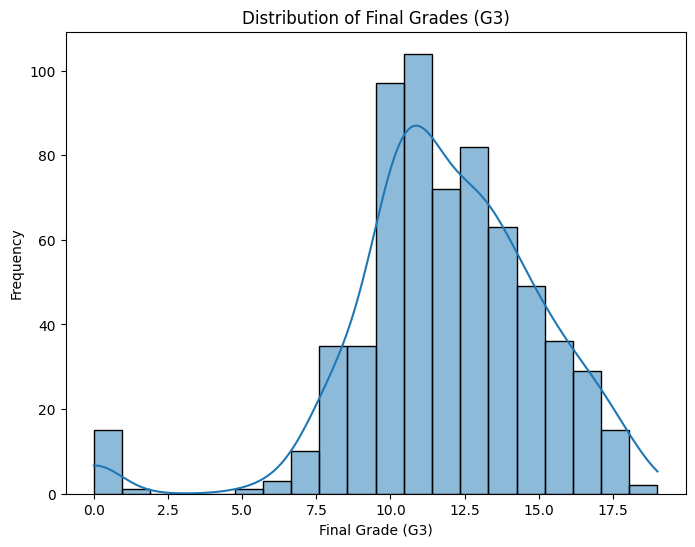

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

In [38]:
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

<ipython-input-38-bddbca351368>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-38-bddbca351368>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-38-bddbca351368>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print("\nPreprocessed Features (X_train):")
print(X_train.head())


Preprocessed Features (X_train):
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
332       0    0   18        1        0        1     2     2     0     0  ...   
29        0    1   16        1        0        1     4     4     4     4  ...   
302       0    1   18        0        0        1     3     2     2     2  ...   
286       0    1   17        0        0        1     2     1     2     2  ...   
554       1    0   17        0        0        1     1     1     0     0  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
332         0       4         3      3     1     2       2         0  18  18  
29          1       4         4      5     5     5       5         4  12  11  
302         0       5         3      2     1     1       3         2  10  11  
286         0       4         4      2     2     4       5         0  12  12  
554         1       3         5      5     2     2       4         3  10  11  

[5 r

In [41]:
print("\nPreprocessed Target Variable (y_train):")
print(y_train.head())


Preprocessed Target Variable (y_train):
332    18
29     12
302    12
286    13
554    10
Name: G3, dtype: int64


In [42]:
classifier = DecisionTreeClassifier(random_state=42)

In [43]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4076923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         1
           8       0.60      0.43      0.50         7
           9       0.17      0.20      0.18         5
          10       0.25      0.18      0.21        17
          11       0.52      0.56      0.54        25
          12       0.43      0.38      0.40        16
          13       0.47      0.62      0.53        13
          14       0.33      0.17      0.22        12
          15       0.44      0.40      0.42        10
          16       0.60      0.67      0.63         9
          17       0.27      0.60      0.37         5
          18       0.67      0.29      0.40         7
          19       0.00      0.00      0.00         1

    accuracy                           0.41       130
   macro avg       0.38      0.36      0.35       130
weighted avg       0.43   

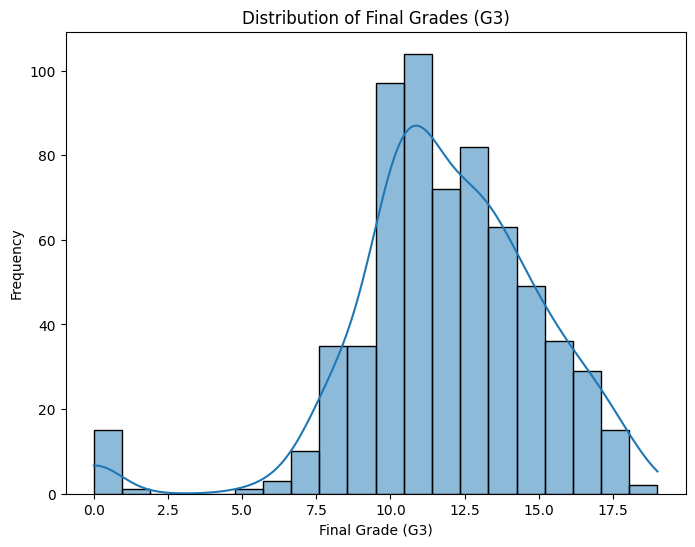

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-47-bddd54c3fa48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


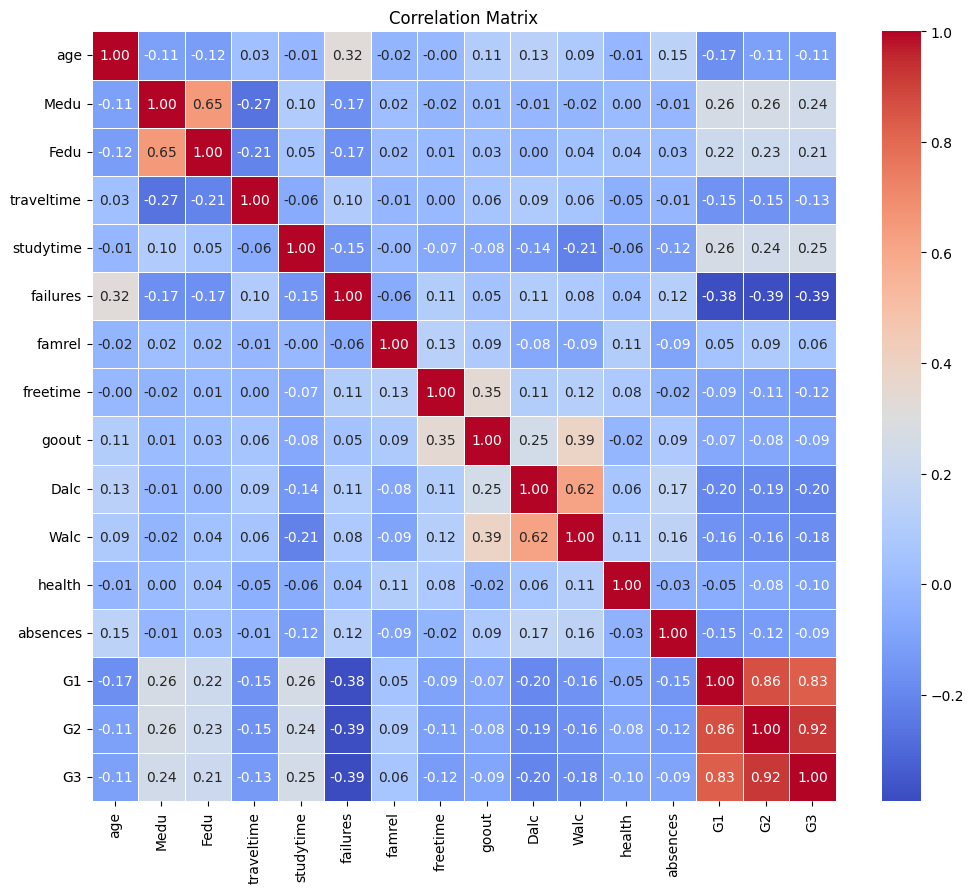

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

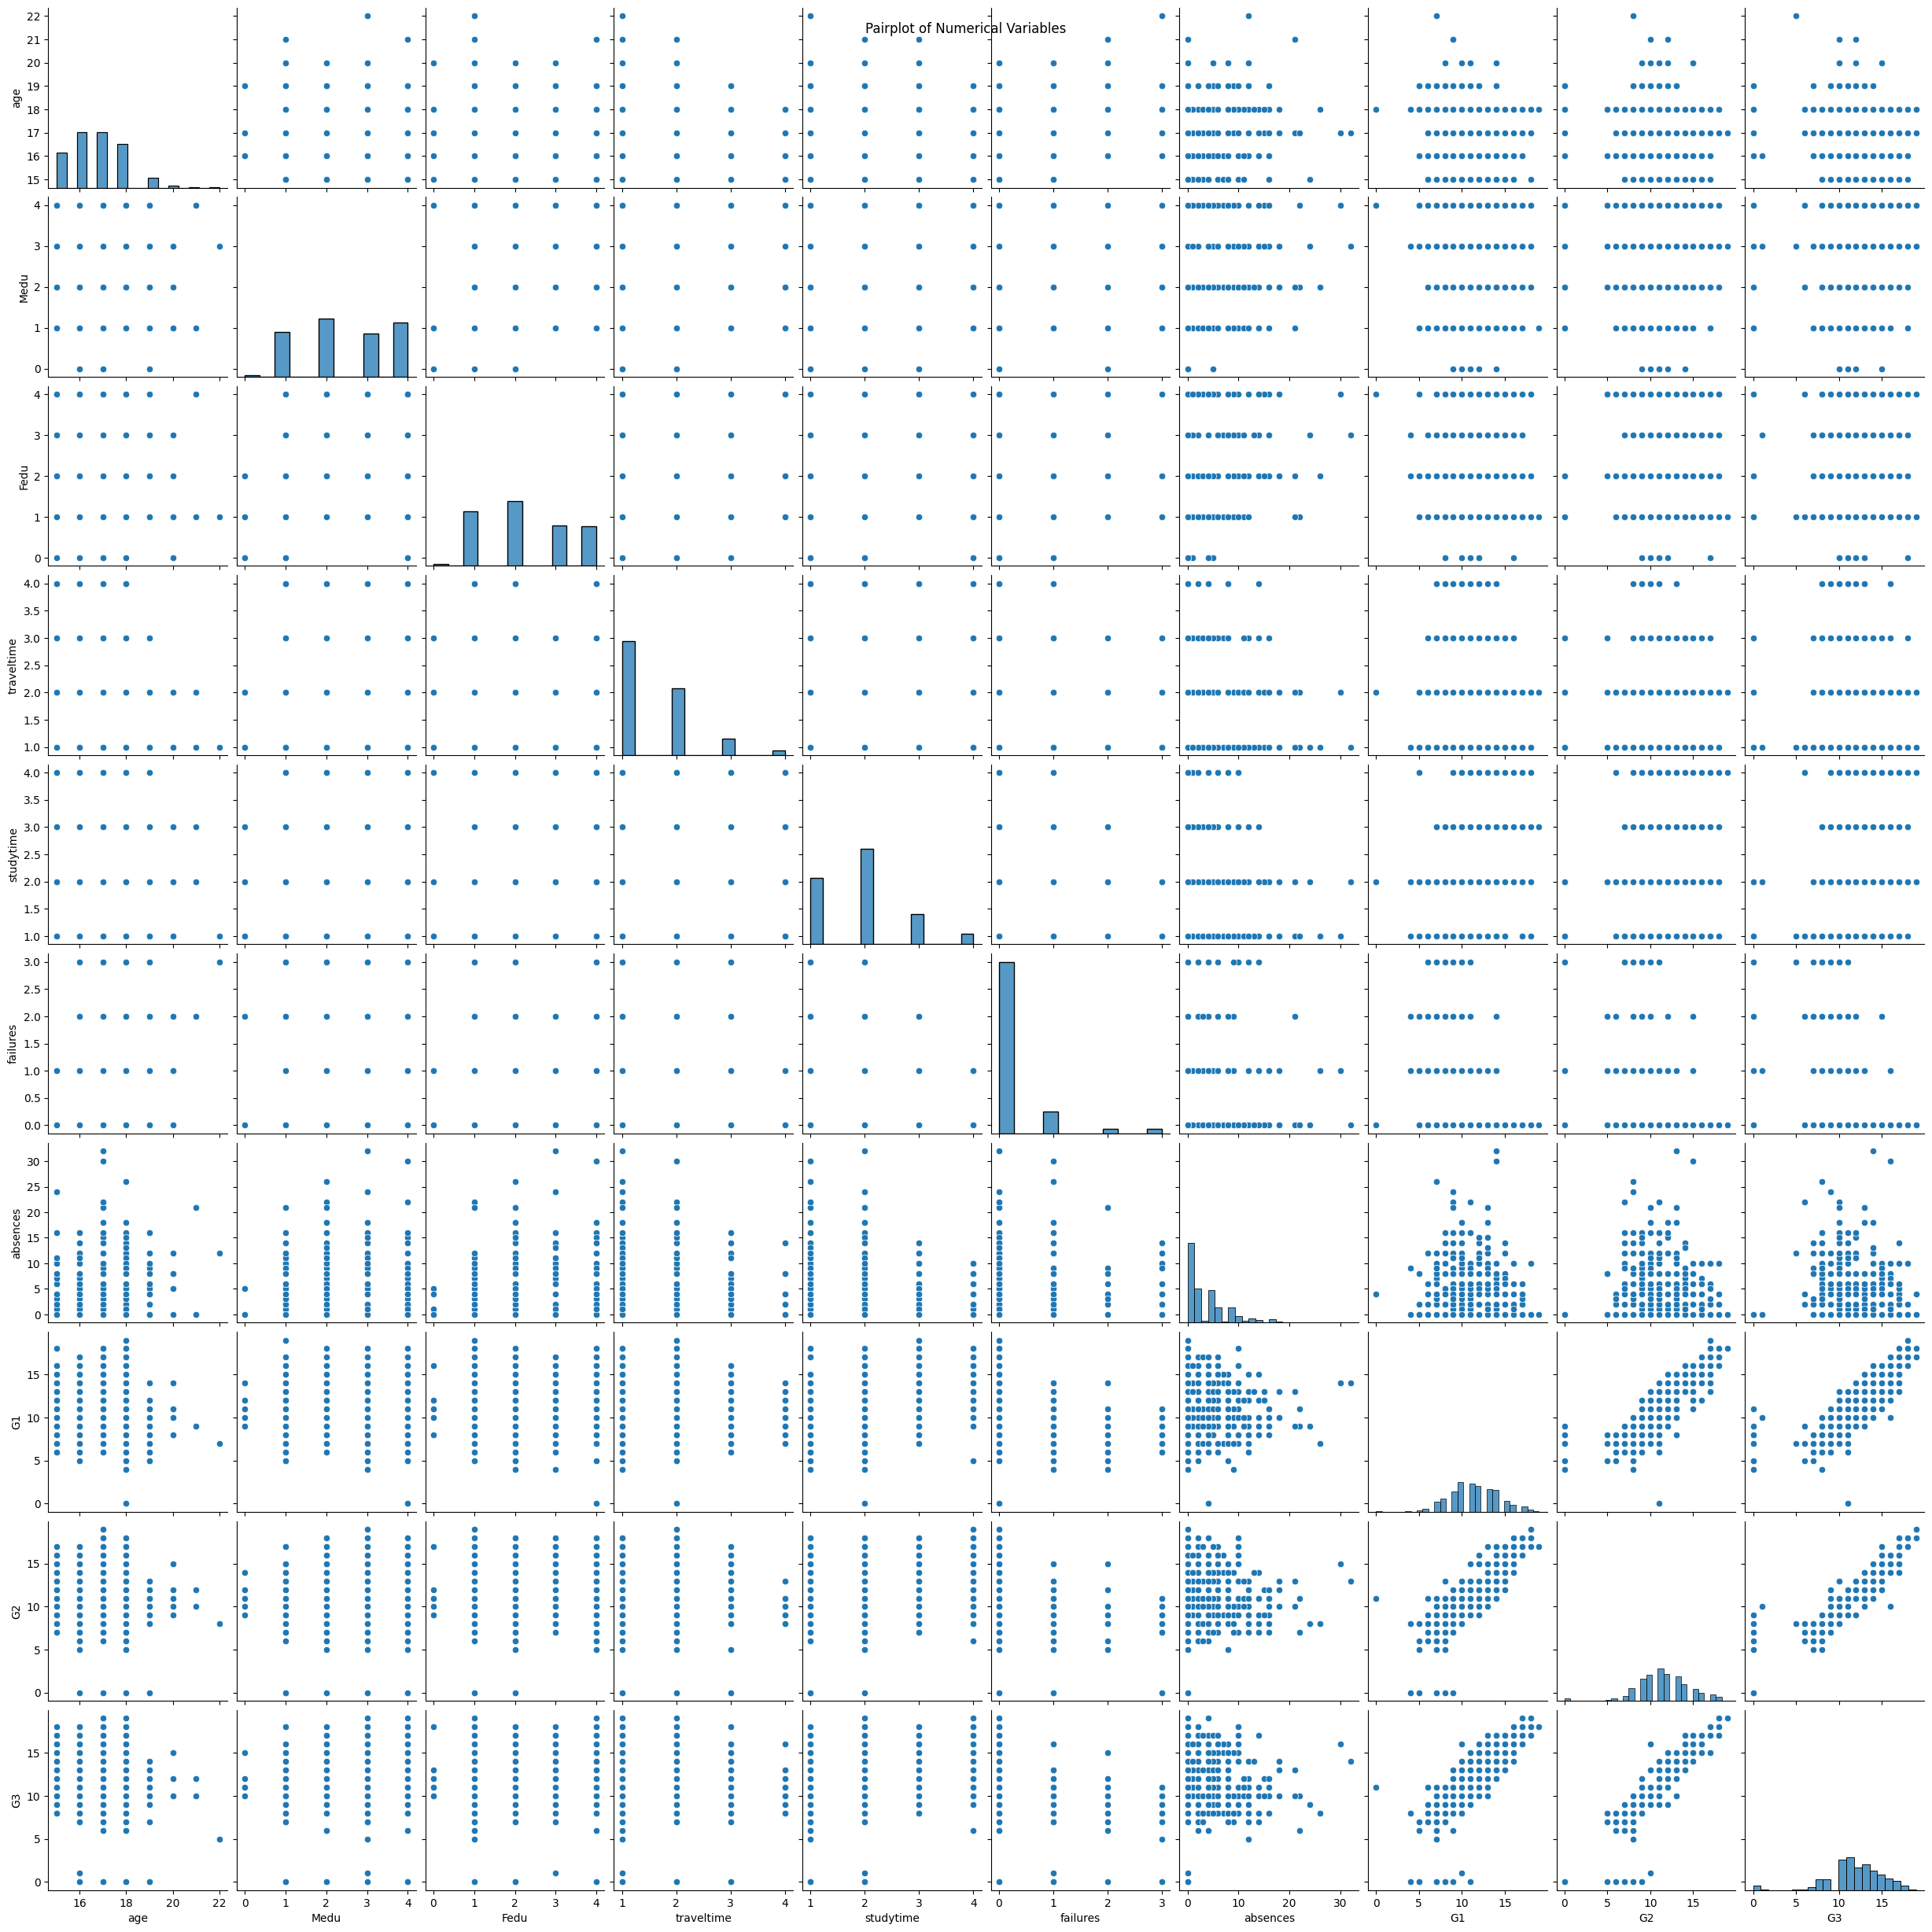

In [25]:
sns.pairplot(df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

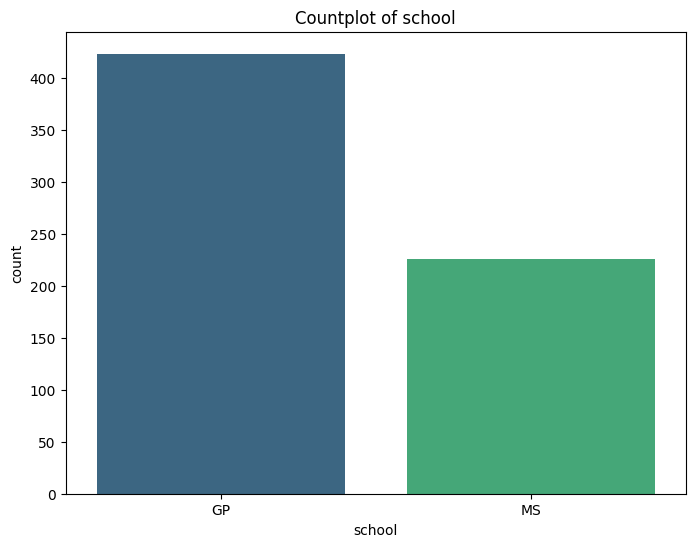

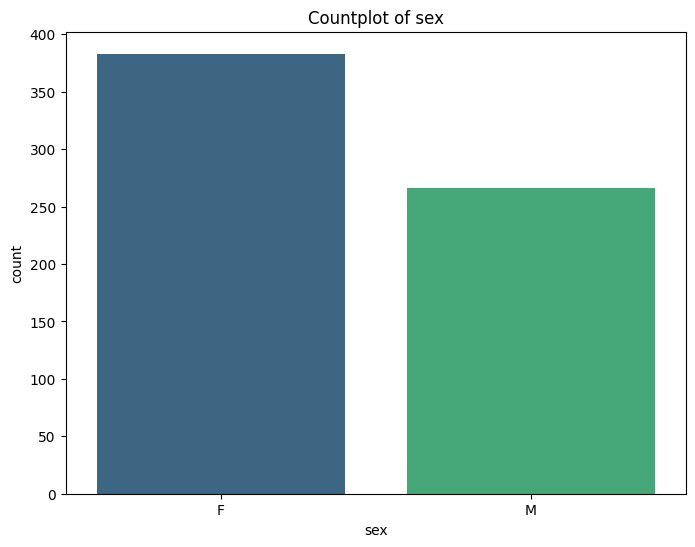

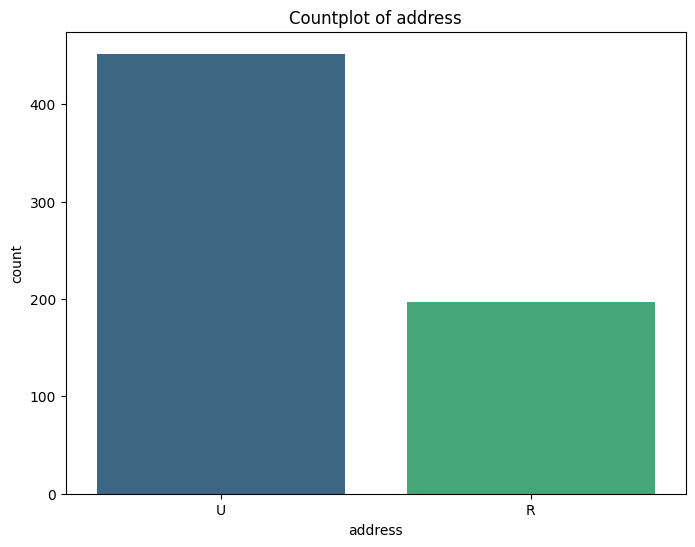

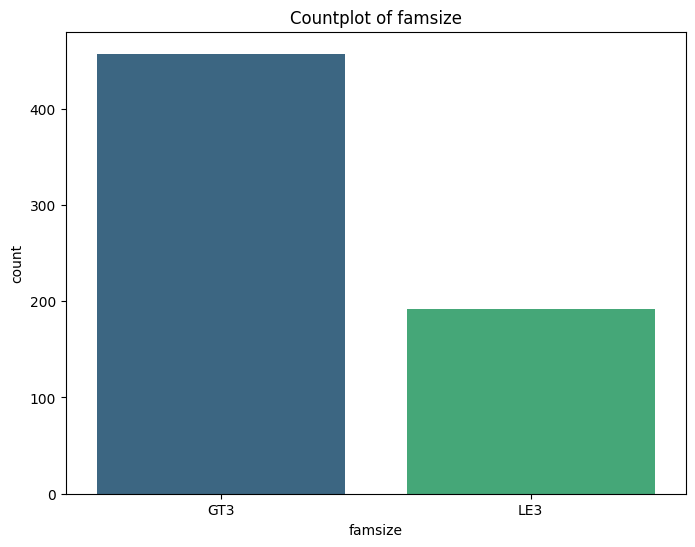

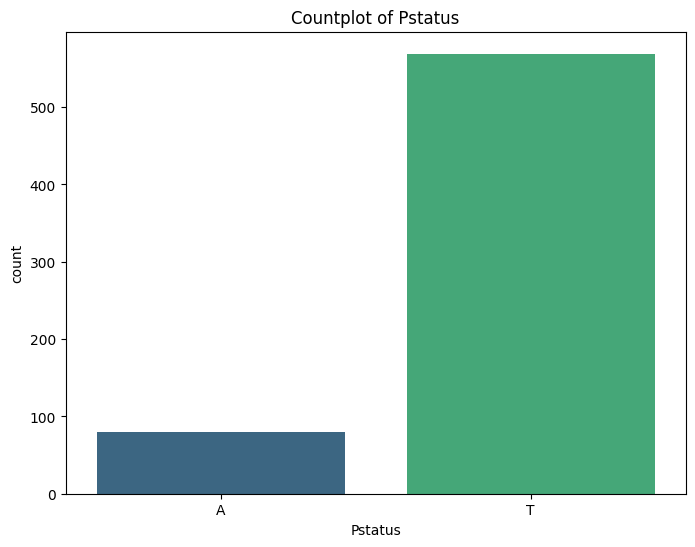

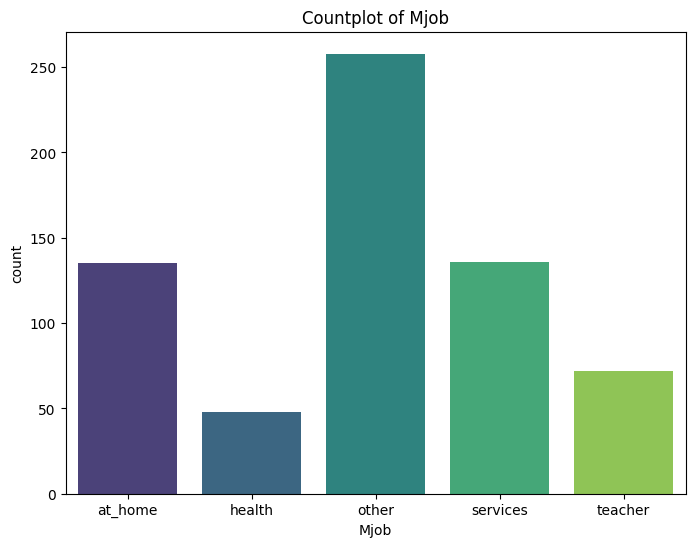

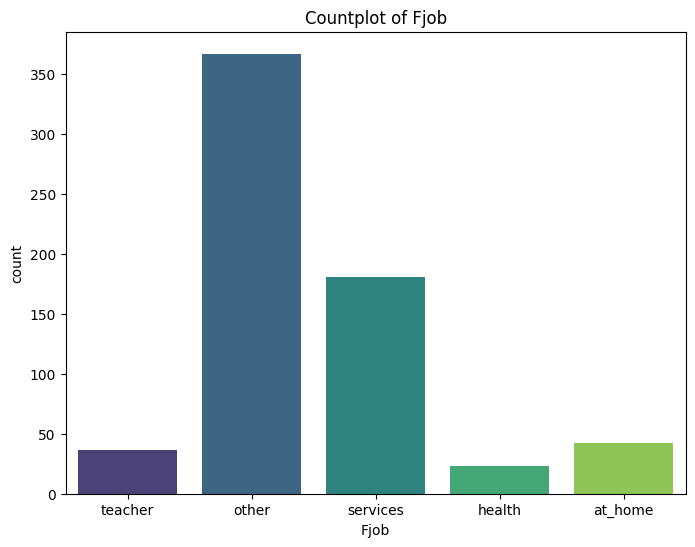

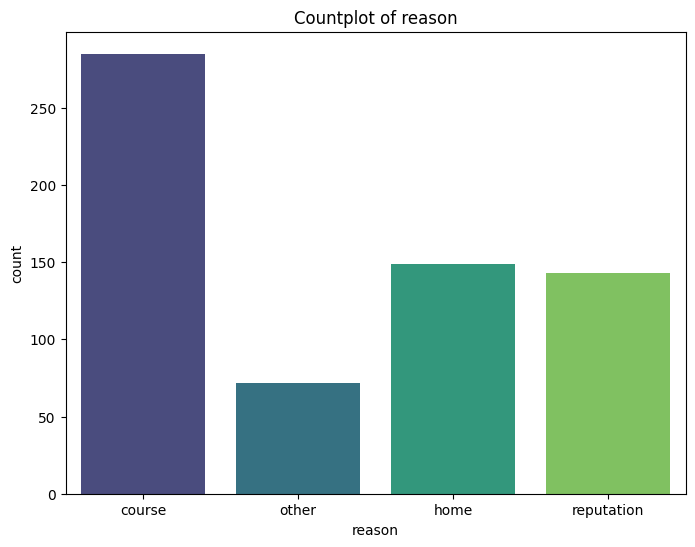

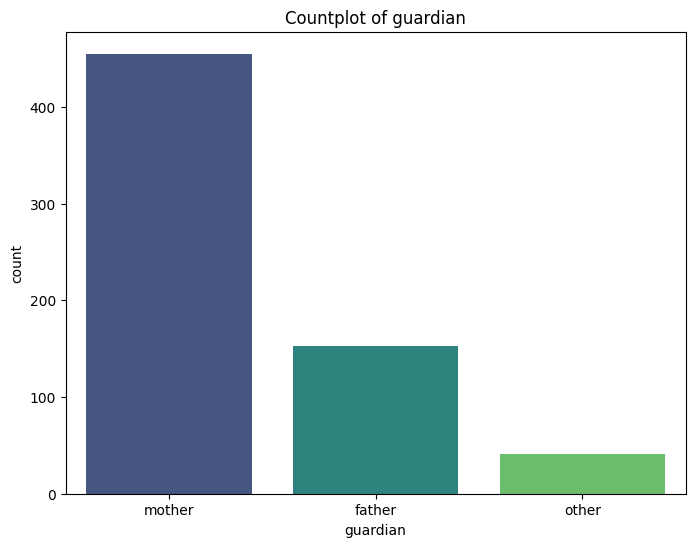

In [26]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.show()